#**Detecting ORF by using Machine Learning**#

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re

In [ ]:
#to import our BD jobposting dataset
thesis_dataset=pd.read_excel(r'/content/sample_data/Jobpost.xlsx')

#to import kaggle dataset
dt= pd.read_excel(r'/content/sample_data/Jobpost.xlsx')

In [ ]:
thesis_dataset.shape

(4000, 17)

In [ ]:
thesis_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                4000 non-null   object
 1   Location             3999 non-null   object
 2   Department           4000 non-null   object
 3   Salary_range         3783 non-null   object
 4   Company_profile      3916 non-null   object
 5   Job Description      3855 non-null   object
 6   Requirement          3850 non-null   object
 7   Benefits             2764 non-null   object
 8   Telecommunicating    4000 non-null   int64 
 9   Has_Company_Logo     4000 non-null   int64 
 10  Has_Question         4000 non-null   int64 
 11  Employment_type      3965 non-null   object
 12  Required_experience  3613 non-null   object
 13  Required_education   3954 non-null   object
 14  Attractive words     4000 non-null   int64 
 15  fraudulent           4000 non-null   int64 
 16  Link  

In [ ]:
thesis_dataset.columns

Index(['Title', 'Location', 'Department', 'Salary_range', 'Company_profile',
       'Job Description', 'Requirement', 'Benefits', 'Telecommunicating',
       'Has_Company_Logo', 'Has_Question', 'Employment_type',
       'Required_experience', 'Required_education', 'Attractive words',
       'fraudulent', 'Link'],
      dtype='object')

#**Data Processing**#

In [ ]:
thesis_dataset.isnull().sum()

Title                     0
Location                  1
Department                0
Salary_range            217
Company_profile          84
Job Description         145
Requirement             150
Benefits               1236
Telecommunicating         0
Has_Company_Logo          0
Has_Question              0
Employment_type          35
Required_experience     387
Required_education       46
Attractive words          0
fraudulent                0
Link                      0
dtype: int64

In [ ]:
thesis_dataset

,Title,Location,Department,Salary_range,Company_profile,Job Description,Requirement,Benefits,Telecommunicating,Has_Company_Logo,Has_Question,Employment_type,Required_experience,Required_education,Attractive words,fraudulent,Link
0,Supervisor/Line Chief,Gazipur,Textile,NaN,Elegant,Keen knowledge about operation breakdown or ma...,Age 25-30years,NaN,0,0,0,Full-time,10 years,Masters degree. Good with computers,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9130...
1,Compilance Office,Gazipur,Textile,NaN,Elegant,We are the first one ever in Bangladesh to pro...,Postive attitude and good communication skills.,NaN,0,0,0,Full-time,7years,BAchelors degree,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9127...
2,Cutting Master cum trainer,Cox's bazar,Textile,30000,Prottyashi,Full responsibility for quality function withi...,At least 05 years of professional experience i...,NaN,0,1,0,Contractual,5years,SSC/HSC,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9129...
3,"Executive, Q.C",Dhaka,Textile,NaN,Colorplus Masterbatch Manufacturing Co. Ltd.,We are the first one ever in Bangladesh to pro...,Age 22-33yrs. Fresh graduates are encouarged t...,2 festival bonuses. Extensive salary package.,0,1,0,Full-time,NaN,Graduation in polymer science/ chemistry/ appl...,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9131...
4,Sr. Executive/ Executive- Garments Planning,Gazipur,Textile,negotiable,Liberty Knitwear Ltd.,Experience in Knit Composite Garments Factory ...,Age at least 25 and only male,"Festival Bonus: 2. Mobile bill, Tour allowance...",0,0,0,Full-time,4years,Bachelor of Science (BSc) in Textile Technology,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9131...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,Project Manager,Dhaka,Production/Operation,Negotiable,EB Group,Managing project progress and adapt work as re...,Age 27 to 38 years,NaN,0,0,0,Full-time,3 to 7 year(s),"Bachelor of Business Administration (BBA), Mas...",0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9367...
3996,Quality Compliance Officer,Dhaka,Production/Operation,Negotiable,SMC Enterprise Ltd.,Perform in process inspection to verify the re...,Age at most 30 years,NaN,0,0,0,Full-time,1 to 2 year(s),"Master of Science (MSc) in Chemistry, Applied ...",0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9375...
3997,Production Lead-Adhesive and Resin,Dhaka,Production/Operation,Negotiable,Star Adhesive Limited; a concern of Partex Sta...,Ensure timely implementation of new projects a...,Age 35 to 45 years,"Mobile bill, Tour allowance, Gratuity, Salary ...",0,0,0,Full-time,8 to 10 year(s),Bachelor in Engineering (BEngg) in Chemical Te...,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9374...
3998,Colorist,Dhaka,Production/Operation,Negotiable,A Multinational Company,Able to formulate color recipe by him/herself ...,Age 28 to 38 years,NaN,0,0,0,Full-time,At least 5 year(s),Graduate/post graduate,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9374...


In [ ]:
#for our dataset
txt=['Title','Department','Company_profile','Job Description','Requirement','Benefits','Required_experience','Required_education']
#for kaggle dataset
#txt=['Title','Department','Company_profile','Job Description','Requirement','Benefits','function','Required_experience','Required_education']

In [ ]:
thesis_dataset.dtypes

Title                  object
Location               object
Department             object
Salary_range           object
Company_profile        object
Job Description        object
Requirement            object
Benefits               object
Telecommunicating       int64
Has_Company_Logo        int64
Has_Question            int64
Employment_type        object
Required_experience    object
Required_education     object
Attractive words        int64
fraudulent              int64
Link                   object
dtype: object

#**Copy of Dataset**#

In [ ]:
dataset=thesis_dataset.copy()

In [ ]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
for tc in txt:
  dataset[tc]=dataset[tc].str.replace('[^\w\s]',' ')
  print(dataset[tc][0])
  dataset[tc]=dataset[tc].apply(lambda x: ' '.join([word for word in str(x).lower().split() if word not in stop]))
  dataset[tc]=dataset[tc].str.split().str.len()
dataset

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Supervisor Line Chief
Textile
Elegant
Keen knowledge about operation breakdown or machine layout 
Age 25 30years
nan
10 years
Masters degree  Good with computers


,Title,Location,Department,Salary_range,Company_profile,Job Description,Requirement,Benefits,Telecommunicating,Has_Company_Logo,Has_Question,Employment_type,Required_experience,Required_education,Attractive words,fraudulent,Link
0,3,Gazipur,1,NaN,1,6,3,1,0,0,0,Full-time,2,4,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9130...
1,2,Gazipur,1,NaN,1,16,5,1,0,0,0,Full-time,1,2,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9127...
2,4,Cox's bazar,1,30000,1,17,10,1,0,1,0,Contractual,1,2,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9129...
3,3,Dhaka,1,NaN,5,16,7,6,0,1,0,Full-time,1,6,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9131...
4,5,Gazipur,1,negotiable,3,19,4,12,0,0,0,Full-time,1,5,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9131...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2,Dhaka,2,Negotiable,2,15,4,1,0,0,0,Full-time,3,8,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9367...
3996,3,Dhaka,2,Negotiable,3,18,3,1,0,0,0,Full-time,3,12,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9375...
3997,4,Dhaka,2,Negotiable,7,31,4,11,0,0,0,Full-time,3,9,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9374...
3998,1,Dhaka,2,Negotiable,2,21,4,1,0,0,0,Full-time,3,3,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9374...


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



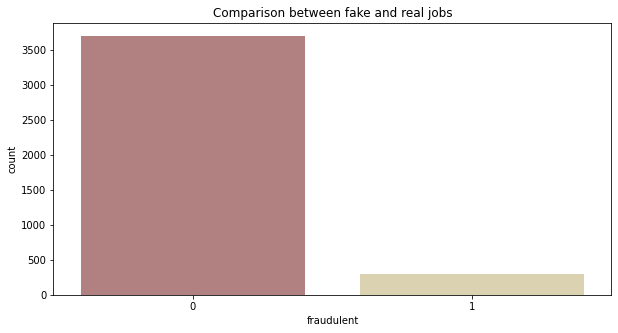

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(thesis_dataset['fraudulent'], palette = 'pink')
plt.title('Comparison between fake and real jobs', fontweight = 30)
plt.ylabel('count')
plt.show()

<class 'list'>


Text(0.5, 0, 'fraudulent')

<Figure size 720x360 with 0 Axes>

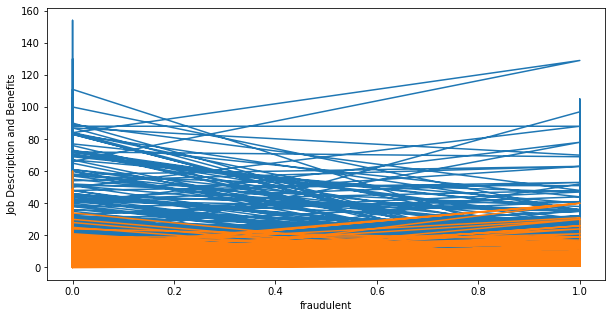

In [ ]:
columns = ['Job Description', 'Benefits']
print(type(columns))

x_data= dataset['fraudulent']
#range(0, student_dataset.shape[0]) #row shape

fig=plt.figure()
fig, ax = plt.subplots()

for c in columns:
  ax.plot(x_data, dataset[c])
#ax.set_title('Job Description and Benefits ')
plt.ylabel('Job Description and Benefits')
plt.xlabel('fraudulent')

<class 'list'>


Text(0.5, 0, 'fraudulent')

<Figure size 720x360 with 0 Axes>

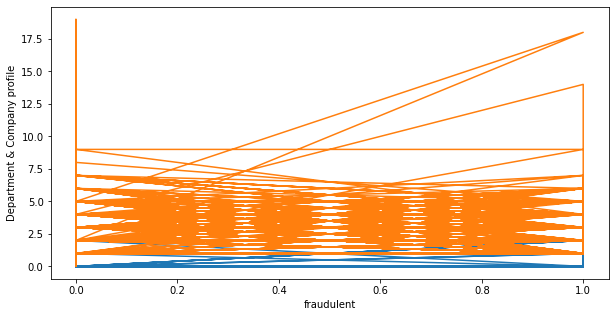

In [ ]:
columns = ['Department', 'Company_profile']
print(type(columns))

x_data= dataset['fraudulent']
#range(0, student_dataset.shape[0]) #row shape

fig=plt.figure()
fig, ax = plt.subplots()

for c in columns:
  ax.plot(x_data, dataset[c])
#ax.set_title('Department and Company profile')
plt.ylabel('Department & Company profile')
plt.xlabel('fraudulent')

<class 'list'>


Text(0.5, 0, 'fraudulent')

<Figure size 720x360 with 0 Axes>

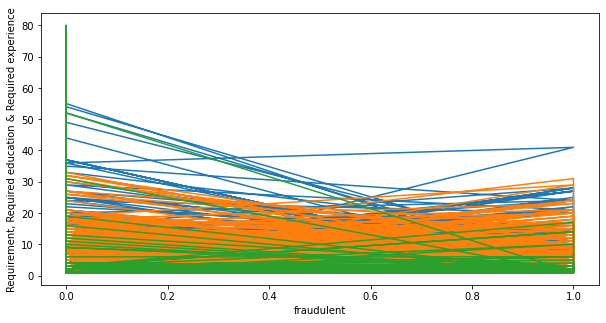

In [ ]:
columns = [ 'Requirement','Required_education','Required_experience']
print(type(columns))

x_data= dataset['fraudulent']
#range(0, student_dataset.shape[0]) #row shape

fig=plt.figure()
fig, ax = plt.subplots()

for c in columns:
  ax.plot(x_data, dataset[c])
#ax.set_title('Requirement, Required education and Required experience ')
plt.ylabel('Requirement, Required education & Required experience')
plt.xlabel('fraudulent')

In [ ]:
dt

,Title,Location,Department,Salary_range,Company_profile,Job Description,Requirement,Benefits,Telecommunicating,Has_Company_Logo,Has_Question,Employment_type,Required_experience,Required_education,Attractive words,fraudulent,Link
0,Supervisor/Line Chief,Gazipur,Textile,NaN,Elegant,Keen knowledge about operation breakdown or ma...,Age 25-30years,NaN,0,0,0,Full-time,10 years,Masters degree. Good with computers,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9130...
1,Compilance Office,Gazipur,Textile,NaN,Elegant,We are the first one ever in Bangladesh to pro...,Postive attitude and good communication skills.,NaN,0,0,0,Full-time,7years,BAchelors degree,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9127...
2,Cutting Master cum trainer,Cox's bazar,Textile,30000,Prottyashi,Full responsibility for quality function withi...,At least 05 years of professional experience i...,NaN,0,1,0,Contractual,5years,SSC/HSC,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9129...
3,"Executive, Q.C",Dhaka,Textile,NaN,Colorplus Masterbatch Manufacturing Co. Ltd.,We are the first one ever in Bangladesh to pro...,Age 22-33yrs. Fresh graduates are encouarged t...,2 festival bonuses. Extensive salary package.,0,1,0,Full-time,NaN,Graduation in polymer science/ chemistry/ appl...,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9131...
4,Sr. Executive/ Executive- Garments Planning,Gazipur,Textile,negotiable,Liberty Knitwear Ltd.,Experience in Knit Composite Garments Factory ...,Age at least 25 and only male,"Festival Bonus: 2. Mobile bill, Tour allowance...",0,0,0,Full-time,4years,Bachelor of Science (BSc) in Textile Technology,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9131...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,Project Manager,Dhaka,Production/Operation,Negotiable,EB Group,Managing project progress and adapt work as re...,Age 27 to 38 years,NaN,0,0,0,Full-time,3 to 7 year(s),"Bachelor of Business Administration (BBA), Mas...",0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9367...
3996,Quality Compliance Officer,Dhaka,Production/Operation,Negotiable,SMC Enterprise Ltd.,Perform in process inspection to verify the re...,Age at most 30 years,NaN,0,0,0,Full-time,1 to 2 year(s),"Master of Science (MSc) in Chemistry, Applied ...",0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9375...
3997,Production Lead-Adhesive and Resin,Dhaka,Production/Operation,Negotiable,Star Adhesive Limited; a concern of Partex Sta...,Ensure timely implementation of new projects a...,Age 35 to 45 years,"Mobile bill, Tour allowance, Gratuity, Salary ...",0,0,0,Full-time,8 to 10 year(s),Bachelor in Engineering (BEngg) in Chemical Te...,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9374...
3998,Colorist,Dhaka,Production/Operation,Negotiable,A Multinational Company,Able to formulate color recipe by him/herself ...,Age 28 to 38 years,NaN,0,0,0,Full-time,At least 5 year(s),Graduate/post graduate,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9374...


In [ ]:
cat_cols = ["Benefits"]

dataset[cat_cols]

,Benefits
0,1
1,1
2,1
3,6
4,12
...,...
3995,1
3996,1
3997,11
3998,1


                        Title  Department  ...  Attractive words  fraudulent
Title                1.000000    0.087146  ...          0.016726   -0.073226
Department           0.087146    1.000000  ...         -0.006129   -0.048080
Company_profile      0.026022    0.132553  ...         -0.008267   -0.039262
Job Description      0.010809   -0.252312  ...          0.049051   -0.026911
Requirement          0.066043   -0.229324  ...          0.031345   -0.080400
Benefits             0.052159    0.004009  ...          0.041216   -0.133120
Telecommunicating   -0.032521   -0.179471  ...          0.065227    0.038293
Has_Company_Logo     0.055989   -0.057940  ...          0.100356   -0.060013
Has_Question              NaN         NaN  ...               NaN         NaN
Required_experience  0.056979   -0.030266  ...          0.008355   -0.083138
Required_education   0.056437   -0.144815  ...          0.017007   -0.048111
Attractive words     0.016726   -0.006129  ...          1.000000    0.080629

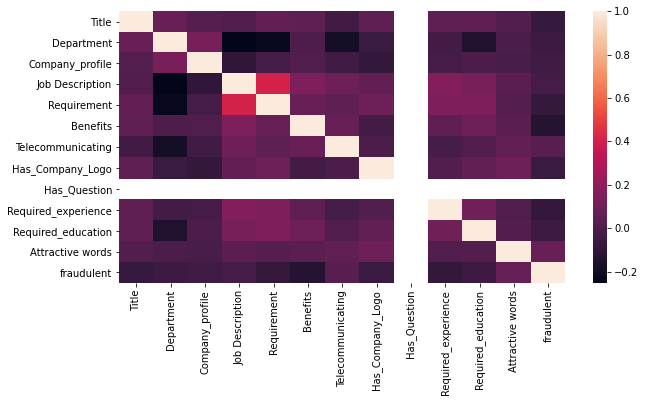

In [ ]:
co=dataset.corr()
print(co)
sns.heatmap(co)


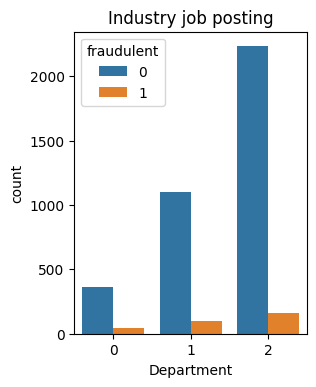

In [ ]:
plt.figure(figsize=(3,4), dpi=100)
sns.countplot(x='Department', data=dataset, hue='fraudulent')
plt.title('Industry job posting')
plt.show()

In [ ]:
thesis_dataset.head(6)

,Title,Location,Department,Salary_range,Company_profile,Job Description,Requirement,Benefits,Telecommunicating,Has_Company_Logo,Has_Question,Employment_type,Required_experience,Required_education,Attractive words,fraudulent,Link
0,Supervisor/Line Chief,Gazipur,Textile,NaN,Elegant,Keen knowledge about operation breakdown or ma...,Age 25-30years,NaN,0,0,0,Full-time,10 years,Masters degree. Good with computers,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9130...
1,Compilance Office,Gazipur,Textile,NaN,Elegant,We are the first one ever in Bangladesh to pro...,Postive attitude and good communication skills.,NaN,0,0,0,Full-time,7years,BAchelors degree,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9127...
2,Cutting Master cum trainer,Cox's bazar,Textile,30000,Prottyashi,Full responsibility for quality function withi...,At least 05 years of professional experience i...,NaN,0,1,0,Contractual,5years,SSC/HSC,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9129...
3,"Executive, Q.C",Dhaka,Textile,NaN,Colorplus Masterbatch Manufacturing Co. Ltd.,We are the first one ever in Bangladesh to pro...,Age 22-33yrs. Fresh graduates are encouarged t...,2 festival bonuses. Extensive salary package.,0,1,0,Full-time,NaN,Graduation in polymer science/ chemistry/ appl...,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9131...
4,Sr. Executive/ Executive- Garments Planning,Gazipur,Textile,negotiable,Liberty Knitwear Ltd.,Experience in Knit Composite Garments Factory ...,Age at least 25 and only male,"Festival Bonus: 2. Mobile bill, Tour allowance...",0,0,0,Full-time,4years,Bachelor of Science (BSc) in Textile Technology,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9131...
5,Quality Controller,Dhaka,Textile,NaN,A Reputed Buying House,Coordination with Merchandising Team on the da...,"Age 28-32, Only male",NaN,0,0,0,Full-time,4years,Graduate/ Masters from any reputed institution.,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9129...


In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

for dt in txt:
  d_prev = thesis_dataset[tc].copy()
  d_prev
  thesis_dataset[dt]=thesis_dataset[dt].str.replace('[^\w\s]',' ')
  print(thesis_dataset[dt][0])
  thesis_dataset[dt]=thesis_dataset[dt].apply(lambda x: ' '.join([word for word in str(x).lower().split() if word not in stop]))
d_prev
thesis_dataset.head(6)


Supervisor Line Chief
Textile
Elegant
Keen knowledge about operation breakdown or machine layout 
Age 25 30years
nan
10 years
Masters degree  Good with computers


,Title,Location,Department,Salary_range,Company_profile,Job Description,Requirement,Benefits,Telecommunicating,Has_Company_Logo,Has_Question,Employment_type,Required_experience,Required_education,Attractive words,fraudulent,Link
0,supervisor line chief,Gazipur,textile,NaN,elegant,keen knowledge operation breakdown machine layout,age 25 30years,nan,0,0,0,Full-time,10 years,masters degree good computers,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9130...
1,compilance office,Gazipur,textile,NaN,elegant,first one ever bangladesh produce color master...,postive attitude good communication skills,nan,0,0,0,Full-time,7years,bachelors degree,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9127...
2,cutting master cum trainer,Cox's bazar,textile,30000,prottyashi,full responsibility quality function within lo...,least 05 years professional experience working...,nan,0,1,0,Contractual,5years,ssc hsc,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9129...
3,executive q c,Dhaka,textile,NaN,colorplus masterbatch manufacturing co ltd,first one ever bangladesh produce color master...,age 22 33yrs fresh graduates encouarged apply,2 festival bonuses extensive salary package,0,1,0,Full-time,nan,graduation polymer science chemistry applied c...,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9131...
4,sr executive executive garments planning,Gazipur,textile,negotiable,liberty knitwear ltd,experience knit composite garments factory pla...,age least 25 male,festival bonus 2 mobile bill tour allowance me...,0,0,0,Full-time,4years,bachelor science bsc textile technology,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9131...
5,quality controller,Dhaka,textile,NaN,reputed buying house,coordination merchandising team day day activi...,age 28 32 male,nan,0,0,0,Full-time,4years,graduate masters reputed institution,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9129...


In [ ]:
for tc in txt:
  print(tc)
  cv = TfidfVectorizer(max_features = 25)
  x = cv.fit_transform(thesis_dataset[tc])
  colm = cv.get_feature_names()
  print(colm)
  df1 = pd.DataFrame(x.toarray(), columns=cv.get_feature_names())
  print(df1)
  thesis_dataset.drop([tc], axis=1, inplace=True)
  thesis_dataset = pd.concat([df1,thesis_dataset], axis=1)
thesis_dataset.head(10)

Title
['accounts', 'assistant', 'asst', 'deputy', 'designer', 'developer', 'development', 'engineer', 'executive', 'finance', 'garments', 'knit', 'manager', 'marketing', 'merchandiser', 'officer', 'production', 'project', 'quality', 'sales', 'senior', 'software', 'sr', 'unit', 'woven']
      accounts  assistant  asst  deputy  ...  software        sr  unit  woven
0          0.0        0.0   0.0     0.0  ...       0.0  0.000000   0.0    0.0
1          0.0        0.0   0.0     0.0  ...       0.0  0.000000   0.0    0.0
2          0.0        0.0   0.0     0.0  ...       0.0  0.000000   0.0    0.0
3          0.0        0.0   0.0     0.0  ...       0.0  0.000000   0.0    0.0
4          0.0        0.0   0.0     0.0  ...       0.0  0.446128   0.0    0.0
...        ...        ...   ...     ...  ...       ...       ...   ...    ...
3995       0.0        0.0   0.0     0.0  ...       0.0  0.000000   0.0    0.0
3996       0.0        0.0   0.0     0.0  ...       0.0  0.000000   0.0    0.0
3997       

,accounting,administration,bachelor,bba,bsc,business,computer,degree,diploma,discipline,engineering,graduate,graduation,marketing,master,masters,mba,mechanical,minimum,reputed,sc,science,technology,textile,university,10,12,14,15,20,3years,5years,6year,8years,applicants,area,business,engineering,experience,field,...,ngo,operation,production,research,sales,textile,accounts,assistant,asst,deputy,designer,developer,development,engineer,executive,finance,garments,knit,manager,marketing,merchandiser,officer,production,project,quality,sales,senior,software,sr,unit,woven,Location,Salary_range,Telecommunicating,Has_Company_Logo,Has_Question,Employment_type,Attractive words,fraudulent,Link
0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.61087,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.791731,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.599626,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Gazipur,NaN,0,0,0,Full-time,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9130...
1,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.00000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Gazipur,NaN,0,0,0,Full-time,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9127...
2,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Cox's bazar,30000,0,1,0,Contractual,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9129...
3,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.82418,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.566327,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Dhaka,NaN,0,1,0,Full-time,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9131...
4,0.0,0.000000,0.263852,0.0,0.444724,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.381080,0.570137,0.512176,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.698595,0.0,0.559406,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.446128,0.0,0.0,Gazipur,negotiable,0,0,0,Full-time,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9131...
5,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.637177,0.00000,0.0,0.000000,0.569059,0.000000,0.000000,0.0,0.519785,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,Dhaka,NaN,0,0,0,Full-time,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9129...
6,0.0,0.000000,0.259648,0.0,0.437638,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.422529,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.750017,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.580892,0.000000,

In [ ]:
thesis_dataset.head(4)

,accounting,administration,bachelor,bba,bsc,business,computer,degree,diploma,discipline,engineering,graduate,graduation,marketing,master,masters,mba,mechanical,minimum,reputed,sc,science,technology,textile,university,10,12,14,15,20,3years,5years,6year,8years,applicants,area,business,engineering,experience,field,...,ngo,operation,production,research,sales,textile,accounts,assistant,asst,deputy,designer,developer,development,engineer,executive,finance,garments,knit,manager,marketing,merchandiser,officer,production,project,quality,sales,senior,software,sr,unit,woven,Location,Salary_range,Telecommunicating,Has_Company_Logo,Has_Question,Employment_type,Attractive words,fraudulent,Link
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.61087,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.791731,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.599626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Gazipur,NaN,0,0,0,Full-time,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9130...
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Gazipur,NaN,0,0,0,Full-time,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9127...
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cox's bazar,30000,0,1,0,Contractual,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9129...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.82418,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.566327,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dhaka,NaN,0,1,0,Full-time,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9131...


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
col = ['Location','Salary_range','Telecommunicating', 'Has_Company_Logo', 'Employment_type','Attractive words']

for i in col:
  print(i)
  if thesis_dataset[i].dtype == 'object' :
      a= thesis_dataset.columns.get_loc(i)
      print(a)
      thesis_dataset.iloc[:,a] =thesis_dataset.apply(lambda a:le.fit_transform(a.astype(str)),axis=0,result_type='expand')
thesis_dataset

for j in col:
  print(j)
  if dataset[j].dtype == 'object' :
      a= dataset.columns.get_loc(j)
      dataset.iloc[:,a] =dataset.apply(lambda a:le.fit_transform(a.astype(str)),axis=0,result_type='expand')
thesis_dataset

Location
200
Salary_range
201
Telecommunicating
Has_Company_Logo
Employment_type
205
Attractive words
Location
Salary_range
Telecommunicating
Has_Company_Logo
Employment_type
Attractive words


,accounting,administration,bachelor,bba,bsc,business,computer,degree,diploma,discipline,engineering,graduate,graduation,marketing,master,masters,mba,mechanical,minimum,reputed,sc,science,technology,textile,university,10,12,14,15,20,3years,5years,6year,8years,applicants,area,business,engineering,experience,field,...,ngo,operation,production,research,sales,textile,accounts,assistant,asst,deputy,designer,developer,development,engineer,executive,finance,garments,knit,manager,marketing,merchandiser,officer,production,project,quality,sales,senior,software,sr,unit,woven,Location,Salary_range,Telecommunicating,Has_Company_Logo,Has_Question,Employment_type,Attractive words,fraudulent,Link
0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.61087,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.791731,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.599626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,36,288,0,0,0,4,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9130...
1,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,1.00000,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,36,288,0,0,0,4,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9127...
2,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,27,84,0,1,0,2,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9129...
3,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.82418,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.566327,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,30,288,0,1,0,4,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9131...
4,0.0,0.00000,0.263852,0.000000,0.444724,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.381080,0.570137,0.512176,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.698595,0.0,0.559406,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.446128,0.0,0.0,36,289,0,0,0,4,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9131...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.0,0.61343,0.170234,0.315208,0.000000,0.587814,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.277025,0.000000,0.27037,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.730476,0.682939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.434363,0.0,0.0,0.000000,0.000000,0.900738,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,30,184,0,0,0,4,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9367...
3996,0.0,0.00000,0.000000,0.000000,0.000000,0.0

In [ ]:
Y = thesis_dataset['fraudulent']
#thesis_dataset.drop(['fraudulent','Link','Has_Question','Location'],axis=1)
X=thesis_dataset.drop(['fraudulent','Link','Has_Question'],axis=1)
X

,accounting,administration,bachelor,bba,bsc,business,computer,degree,diploma,discipline,engineering,graduate,graduation,marketing,master,masters,mba,mechanical,minimum,reputed,sc,science,technology,textile,university,10,12,14,15,20,3years,5years,6year,8years,applicants,area,business,engineering,experience,field,...,marketing,media,medical,ngo,operation,production,research,sales,textile,accounts,assistant,asst,deputy,designer,developer,development,engineer,executive,finance,garments,knit,manager,marketing,merchandiser,officer,production,project,quality,sales,senior,software,sr,unit,woven,Location,Salary_range,Telecommunicating,Has_Company_Logo,Employment_type,Attractive words
0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.61087,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.791731,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.599626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,36,288,0,0,4,0
1,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,1.00000,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,36,288,0,0,4,0
2,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,27,84,0,1,2,0
3,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.82418,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.566327,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,30,288,0,1,4,0
4,0.0,0.00000,0.263852,0.000000,0.444724,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.381080,0.570137,0.512176,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.698595,0.0,0.559406,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.446128,0.0,0.0,36,289,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.0,0.61343,0.170234,0.315208,0.000000,0.587814,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.277025,0.000000,0.27037,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.730476,0.682939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.434363,0.0,0.0,0.000000,0.000000,0.900738,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,30,184,0,0,4,0
3996,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.914042,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.405620,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.730476,0.682939,0.0,0.0,0.0,0.0,0.0,

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=0,test_size=0.15)

In [ ]:
thesis_dataset

,accounting,administration,bachelor,bba,bsc,business,computer,degree,diploma,discipline,engineering,graduate,graduation,marketing,master,masters,mba,mechanical,minimum,reputed,sc,science,technology,textile,university,10,12,14,15,20,3years,5years,6year,8years,applicants,area,business,engineering,experience,field,...,ngo,operation,production,research,sales,textile,accounts,assistant,asst,deputy,designer,developer,development,engineer,executive,finance,garments,knit,manager,marketing,merchandiser,officer,production,project,quality,sales,senior,software,sr,unit,woven,Location,Salary_range,Telecommunicating,Has_Company_Logo,Has_Question,Employment_type,Attractive words,fraudulent,Link
0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.61087,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.791731,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.599626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,36,288,0,0,0,4,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9130...
1,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,1.00000,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,36,288,0,0,0,4,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9127...
2,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,27,84,0,1,0,2,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9129...
3,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.82418,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.566327,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,30,288,0,1,0,4,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9131...
4,0.0,0.00000,0.263852,0.000000,0.444724,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.381080,0.570137,0.512176,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.698595,0.0,0.559406,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.446128,0.0,0.0,36,289,0,0,0,4,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9131...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.0,0.61343,0.170234,0.315208,0.000000,0.587814,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.277025,0.000000,0.27037,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.730476,0.682939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.434363,0.0,0.0,0.000000,0.000000,0.900738,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,30,184,0,0,0,4,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9367...
3996,0.0,0.00000,0.000000,0.000000,0.000000,0.0

#**Scaler**#

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)
print(X_train)
thesis_dataset

[[-0.22491672 -0.31632122  0.26843694 ...  1.98145122  0.04208138
  -0.18541265]
 [-0.22491672  2.38649762  1.9327596  ... -0.42717736  0.04208138
  -0.18541265]
 [-0.22491672 -0.31632122  1.03688857 ... -0.42717736  0.04208138
  -0.18541265]
 ...
 [-0.22491672 -0.31632122  1.01375822 ... -0.42717736  0.04208138
  -0.18541265]
 [-0.22491672 -0.31632122  1.442861   ... -0.42717736  0.04208138
  -0.18541265]
 [-0.22491672 -0.31632122 -0.74070405 ...  1.98145122  0.04208138
  -0.18541265]]


,accounting,administration,bachelor,bba,bsc,business,computer,degree,diploma,discipline,engineering,graduate,graduation,marketing,master,masters,mba,mechanical,minimum,reputed,sc,science,technology,textile,university,10,12,14,15,20,3years,5years,6year,8years,applicants,area,business,engineering,experience,field,...,ngo,operation,production,research,sales,textile,accounts,assistant,asst,deputy,designer,developer,development,engineer,executive,finance,garments,knit,manager,marketing,merchandiser,officer,production,project,quality,sales,senior,software,sr,unit,woven,Location,Salary_range,Telecommunicating,Has_Company_Logo,Has_Question,Employment_type,Attractive words,fraudulent,Link
0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.61087,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.791731,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.599626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,36,288,0,0,0,4,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9130...
1,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,1.00000,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,36,288,0,0,0,4,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9127...
2,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,27,84,0,1,0,2,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9129...
3,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.82418,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.566327,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,30,288,0,1,0,4,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9131...
4,0.0,0.00000,0.263852,0.000000,0.444724,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.381080,0.570137,0.512176,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.698595,0.0,0.559406,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.446128,0.0,0.0,36,289,0,0,0,4,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9131...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.0,0.61343,0.170234,0.315208,0.000000,0.587814,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.277025,0.000000,0.27037,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.730476,0.682939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.434363,0.0,0.0,0.000000,0.000000,0.900738,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,30,184,0,0,0,4,0,0,https://jobs.bdjobs.com/jobdetails.asp?id=9367...
3996,0.0,0.00000,0.000000,0.000000,0.000000,0.0

# Models

# **LogisticRegression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)
pred_1=lr.predict(X_test)

print("Training Accuracy :", lr.score(X_train, y_train))      
print("Testing Accuracy :", lr.score(X_test, y_test))

Training Accuracy : 0.9685294117647059
Testing Accuracy : 0.95


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



# **SVC**

In [ ]:
from sklearn.svm import SVC
model=SVC()

In [ ]:
model.fit(X_train,y_train)
pred_3=model.predict(X_test)

print("Training Accuracy :", model.score(X_train, y_train))      
print("Testing Accuracy :", model.score(X_test, y_test))

Training Accuracy : 0.9708823529411764
Testing Accuracy : 0.945


## **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=100,criterion="entropy")
rfc.fit(X_train,y_train)
pred_4=rfc.predict(X_test)

print("Training Accuracy :", rfc.score(X_train, y_train))      
print("Testing Accuracy :", rfc.score(X_test, y_test))

Training Accuracy : 0.9908823529411764
Testing Accuracy : 0.9533333333333334


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc2=RandomForestClassifier()
rfc2.fit(X_train,y_train)
pred_r=rfc2.predict(X_test)

print("Training Accuracy :", rfc2.score(X_train, y_train))      
print("Testing Accuracy :", rfc2.score(X_test, y_test))

Training Accuracy : 0.9908823529411764
Testing Accuracy : 0.9566666666666667


## **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()                                             
gnb.fit(X_train, y_train)                                      
pred_5 = gnb.predict(X_test)                                   

print("Training Accuracy :", gnb.score(X_train, y_train))      
print("Testing Accuracy :", gnb.score(X_test, y_test))

Training Accuracy : 0.2538235294117647
Testing Accuracy : 0.25666666666666665


## **Bagging**

In [ ]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier()
bag.fit(X_train, y_train)
pred_6 = bag.predict(X_test)
print("Training Accuracy :", bag.score(X_train, y_train))
print("Testing Accuracy :", bag.score(X_test, y_test))

Training Accuracy : 0.9876470588235294
Testing Accuracy : 0.9583333333333334


## **AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb.fit(X_train, y_train)
pred_7 = bag.predict(X_test)
print("Training Accuracy :", adb.score(X_train, y_train))
print("Testing Accuracy :", adb.score(X_test, y_test))

Training Accuracy : 0.9555882352941176
Testing Accuracy : 0.9483333333333334


## **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = AdaBoostClassifier()
dtc.fit(X_train, y_train)
pred_8 = bag.predict(X_test)
print("Training Accuracy :", dtc.score(X_train, y_train))
print("Testing Accuracy :", dtc.score(X_test, y_test))

Training Accuracy : 0.9555882352941176
Testing Accuracy : 0.9483333333333334


## **9. Gradient Boost**

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier()
hgb.fit(X_train, y_train)
pred_17 = hgb.predict(X_test)
print("Training Accuracy :", hgb.score(X_train, y_train))
print("Testing Accuracy :", hgb.score(X_test, y_test))

Training Accuracy : 0.9908823529411764
Testing Accuracy : 0.955


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
pred_9 = gb.predict(X_test)
print("Training Accuracy :", gb.score(X_train, y_train))
print("Testing Accuracy :", gb.score(X_test, y_test))


Training Accuracy : 0.9738235294117648
Testing Accuracy : 0.96


# **XGBClassifier**

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
pred_10 = xgb.predict(X_test)
print("Training Accuracy :", xgb.score(X_train, y_train))
print("Testing Accuracy :", xgb.score(X_test, y_test))

Training Accuracy : 0.9632352941176471
Testing Accuracy : 0.945


# **VotingClassifier**

In [ ]:
from sklearn.ensemble import VotingClassifier
vc1 = VotingClassifier(estimators=[('lr', lr), ('rf', rfc), ('gnb', gnb)])
#vc2 = VotingClassifier(estimators=[('dt', dtc), ('knn', knn), ('svc', model)])
vc1.fit(X_train, y_train)
#vc2.fit(X_train, y_train)
pred_13 = vc1.predict(X_test)
#pred_14 = vc2.predict(X_test)
print("Training Accuracy1 :", vc1.score(X_train, y_train))
print("Testing Accuracy1 :", vc1.score(X_test, y_test))


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Training Accuracy1 : 0.9841176470588235
Testing Accuracy1 : 0.955


# **LGBMClassifier**

In [ ]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
pred_11 = lgbm.predict(X_test)
print("Training Accuracy :", lgbm.score(X_train, y_train))
print("Testing Accuracy :", lgbm.score(X_test, y_test))

Training Accuracy : 0.9908823529411764
Testing Accuracy : 0.9516666666666667


# **enable_hist_gradient_boosting**

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier()
hgb.fit(X_train, y_train)
pred_17 = hgb.predict(X_test)
print("Training Accuracy :", hgb.score(X_train, y_train))
print("Testing Accuracy :", hgb.score(X_test, y_test))

Training Accuracy : 0.9908823529411764
Testing Accuracy : 0.955


# **ExtraTreesClassifier**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc.fit(X_train, y_train)
pred_14 = etc.predict(X_test)
print("Training Accuracy :", etc.score(X_train, y_train))
print("Testing Accuracy :", etc.score(X_test, y_test))

Training Accuracy : 0.9908823529411764
Testing Accuracy : 0.955


# **PassiveAggressiveClassifier**

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier()
pac.fit(X_train, y_train)
pred_16 = pac.predict(X_test)
print("Training Accuracy :", pac.score(X_train, y_train))
print("Testing Accuracy :", pac.score(X_test, y_test))

Training Accuracy : 0.9558823529411765
Testing Accuracy : 0.9283333333333333


# **catboost**

In [ ]:
!pip3 install catboost
from catboost import CatBoostClassifier
cb = CatBoostClassifier(iterations=5, learning_rate=0.1) 
cb.fit(X_train, y_train)
pred_12 = cb.predict(X_test)
print("Training Accuracy :", cb.score(X_train, y_train))
print("Testing Accuracy :", cb.score(X_test, y_test))

     |████████████████████████████████| 65.8MB 82kB/s 
0:	learn: 0.5901304	total: 137ms	remaining: 549ms
1:	learn: 0.5092742	total: 177ms	remaining: 266ms
2:	learn: 0.4456969	total: 218ms	remaining: 145ms
3:	learn: 0.3967378	total: 258ms	remaining: 64.5ms
4:	learn: 0.3566707	total: 298ms	remaining: 0us
Training Accuracy : 0.9244117647058824
Testing Accuracy : 0.9266666666666666


# **KNeighborsClassifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
list_1=[]
for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_knn=knn.predict(X_test)
    scores=accuracy_score(y_test,pred_knn)
    list_1.append(scores)
n_neighbors = [3,6,9,15]
for n in n_neighbors:    
  knn=KNeighborsClassifier(n)
  knn.fit(X_train,y_train)
  pred_knn=knn.predict(X_test)

  print("Training Accuracy :", knn.score(X_train, y_train))      
  print("Testing Accuracy :", knn.score(X_test, y_test))

Training Accuracy : 0.96
Testing Accuracy : 0.9183333333333333
Training Accuracy : 0.9494117647058824
Testing Accuracy : 0.935
Training Accuracy : 0.9452941176470588
Testing Accuracy : 0.9383333333333334
Training Accuracy : 0.94
Testing Accuracy : 0.935


# **StackingClassifier**

In [ ]:
from sklearn.ensemble import StackingClassifier
sc0 = StackingClassifier(estimators=[('dt', dtc), ('lgbm', lgbm)])
sc0.fit(X_train, y_train)
pred_15 = sc0.predict(X_test)
print("Training Accuracy :", sc0.score(X_train, y_train))
print("Testing Accuracy :", sc0.score(X_test, y_test))

Training Accuracy : 0.9905882352941177
Testing Accuracy : 0.95


# **VotingClassifier**

In [ ]:
from sklearn.ensemble import VotingClassifier
vc2 = VotingClassifier(estimators=[('dt', dtc), ('knn', knn), ('svc', model)])
vc2.fit(X_train, y_train)
pred_14 = vc2.predict(X_test)
print("Training Accuracy2 :", vc2.score(X_train, y_train))
print("Testing Accuracy2 :", vc2.score(X_test, y_test))


Training Accuracy2 : 0.9623529411764706
Testing Accuracy2 : 0.9433333333333334
